<b><h2>1. Import Library yang Digunakan</h2></b>

Bagian ini berfungsi untuk mengimpor seluruh pustaka yang diperlukan dalam proses pengolahan dan analisis data. Library yang digunakan meliputi sklearn untuk pembagian data dan evaluasi model, tensorflow.keras untuk pembuatan arsitektur jaringan saraf tiruan (CNN), numpy untuk manipulasi numerik, cv2 untuk pemrosesan citra, serta matplotlib untuk visualisasi hasil. Selain itu, dilakukan pula proses mount Google Drive agar dataset yang tersimpan di penyimpanan cloud dapat diakses secara langsung oleh program.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt


In [2]:
# memanggil drive google
from google.colab import drive
drive.mount('/content/drives/')

Mounted at /content/drives/


<b><h2>2. Pemanggilan dan Pemuatan Dataset</h2></b>

Pada bagian ini dilakukan proses pemanggilan dataset citra daun yang digunakan sebagai data latih dan uji. Kode mendefinisikan direktori utama tempat penyimpanan dataset di Google Drive serta mendeklarasikan daftar label kelas, seperti daun Nangka dan Daun Sirih. Dua variabel list, yaitu data dan labels, disiapkan untuk menampung citra dan label yang sesuai dengan masing-masing kelas.

In [3]:
imagePaths = '/content/drives/MyDrive/Data/DatasetDaun'
label_list = ['Daun Nangka', 'Daun Sirih']
data = []
labels = []

<b><h2>3. Tahap Praprosesan Data Citra</h2></b>

Tahap ini bertujuan untuk melakukan praproses terhadap data citra agar siap digunakan dalam pelatihan model. Setiap gambar dibaca menggunakan OpenCV (cv2), kemudian diubah ukurannya menjadi 32×32 piksel agar seragam. Data hasil pembacaan disimpan ke dalam list data, sedangkan label kelasnya disimpan ke dalam list labels. Selanjutnya, kedua list dikonversi menjadi array NumPy dan dilakukan normalisasi nilai piksel ke rentang [0,1] untuk meningkatkan efisiensi proses pelatiha

In [4]:
for label in label_list:
    image_dir = imagePaths+'/'+label+'/*.jpg'
    print(f"Looking for images in: {image_dir}") # Add this line to print the path
    for imagePath in glob.glob(image_dir):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

Looking for images in: /content/drives/MyDrive/Data/DatasetDaun/Daun Nangka/*.jpg
Looking for images in: /content/drives/MyDrive/Data/DatasetDaun/Daun Sirih/*.jpg


In [5]:
np.array(data).shape


(102, 32, 32, 3)

In [7]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)


In [8]:
print(labels)


['Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih

In [9]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<b><h2>4. Pembagian Dataset Menjadi Data Latih dan Data Uji</h2></b>

Pada bagian ini, dataset yang telah melalui tahap praproses dibagi menjadi dua subset utama, yaitu data latih (training data) dan data uji (testing data). Proses pembagian dilakukan menggunakan fungsi train_test_split dari pustaka sklearn, dengan tujuan untuk memisahkan data yang digunakan dalam proses pembelajaran model dan data yang digunakan untuk menguji performa model secara objektif.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42)

In [11]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)


Ukuran data train = (81, 32, 32, 3)
Ukuran data test = (21, 32, 32, 3)


<b><h2>5. Perancangan Arsitektur Model CNN</h2></b>

Bagian ini menjelaskan proses pembuatan arsitektur jaringan saraf konvolusional (CNN) menggunakan modul Sequential dari tensorflow.keras. Model dibangun dengan beberapa lapisan utama, seperti convolutional layer, pooling layer, dropout layer, dan fully connected layer. Struktur ini dirancang untuk mengekstraksi fitur penting dari citra daun dan melakukan klasifikasi berdasarkan pola visual yang terdeteksi.

In [12]:
model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=[32, 32, 3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1,
          padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1,
          padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [13]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 50)     │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,646,291 (6.28 MB)

 Trainable params: 1,646,291 (6.28 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# tentukan hyperparameter
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)


In [15]:
# compile arsitektur yang telah dibuat
model.compile(loss='binary_crossentropy',
              optimizer=opt_funct,
              metrics=['accuracy'])


<b><h2>6. Proses Pelatihan Model CNN</h2></b>

Tahap ini merupakan proses pelatihan model CNN menggunakan data latih yang telah disiapkan. Parameter seperti optimizer, loss function, dan batch size diatur sesuai kebutuhan agar model dapat mempelajari pola dengan optimal. Proses pelatihan melibatkan beberapa epoch, di mana setiap epoch merepresentasikan satu siklus penuh pembelajaran terhadap seluruh data latih.

In [16]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test),
              epochs=max_epochs, batch_size=32)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.5282 - loss: 0.6935 - val_accuracy: 0.3810 - val_loss: 0.6961
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.5272 - loss: 0.6924 - val_accuracy: 0.3810 - val_loss: 0.7001
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5389 - loss: 0.6904 - val_accuracy: 0.3810 - val_loss: 0.7044
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5350 - loss: 0.6900 - val_accuracy: 0.3810 - val_loss: 0.7080
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5584 - loss: 0.6876 - val_accuracy: 0.3810 - val_loss: 0.7106
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5232 - loss: 0.6895 - val_accuracy: 0.3810 - val_loss: 0.7018
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5428 - loss: 0.6866 - val_accuracy: 0.3810 - val_loss: 0.7015
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5350 - loss: 0.6894 - val_accuracy: 0.3810 - val_loss

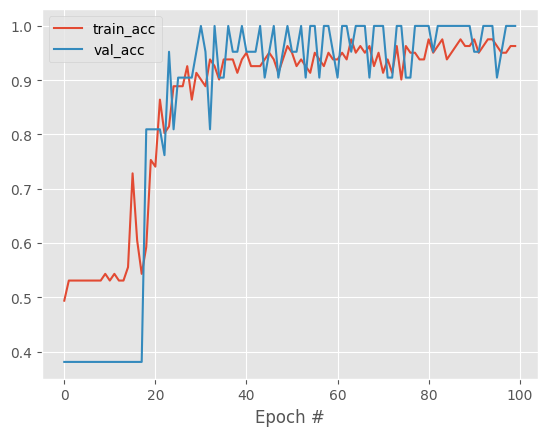

In [17]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
# plt.plot(N, H.history["loss"], label="train_loss")
# plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()


<b><h2>7. Evaluasi Kinerja Model CNN</h2></b>

Bagian ini digunakan untuk mengevaluasi performa model yang telah dilatih dengan menggunakan data uji. Evaluasi dilakukan dengan menghitung metrik seperti accuracy dan classification report guna menilai sejauh mana model mampu mengklasifikasikan data baru dengan benar. Tahap ini memberikan gambaran mengenai kemampuan generalisasi model terhadap data yang belum pernah dilihat sebelumnya.

In [18]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(int)
print(classification_report(y_test, target, target_names=label_list))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
              precision    recall  f1-score   support

 Daun Nangka       1.00      1.00      1.00        13
  Daun Sirih       1.00      1.00      1.00         8

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



<b><h2>8. Pengujian Model Menggunakan Data Baru</h2></b>

Tahap pengujian dilakukan untuk menguji kemampuan model secara langsung pada data baru atau sampel tertentu. Model yang telah dilatih digunakan untuk memprediksi kelas citra uji, kemudian hasil prediksi dibandingkan dengan label sebenarnya. Proses ini membantu memastikan bahwa model tidak hanya bekerja baik pada data latih, tetapi juga pada data nyata yang memiliki variasi lebih luas.

In [19]:
# uji model menggunakan image lain
queryPath = imagePaths+'/Daun Sirih/011.jpg' # Changed to Daun Sirih
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)

print(q_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
[[0.]]


<b><h2>9. Hasil dan Analisis Model yang Dihasilkan</h2></b>

Bagian terakhir menampilkan hasil akhir dari proses pelatihan dan pengujian model. Hasil yang disajikan dapat berupa nilai akurasi, grafik visualisasi loss dan accuracy, maupun contoh hasil prediksi model terhadap citra daun. Tahap ini menjadi kesimpulan dari keseluruhan eksperimen, yang menunjukkan efektivitas model CNN dalam mengklasifikasikan jenis daun berdasarkan citra.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Daun Nangka Test:


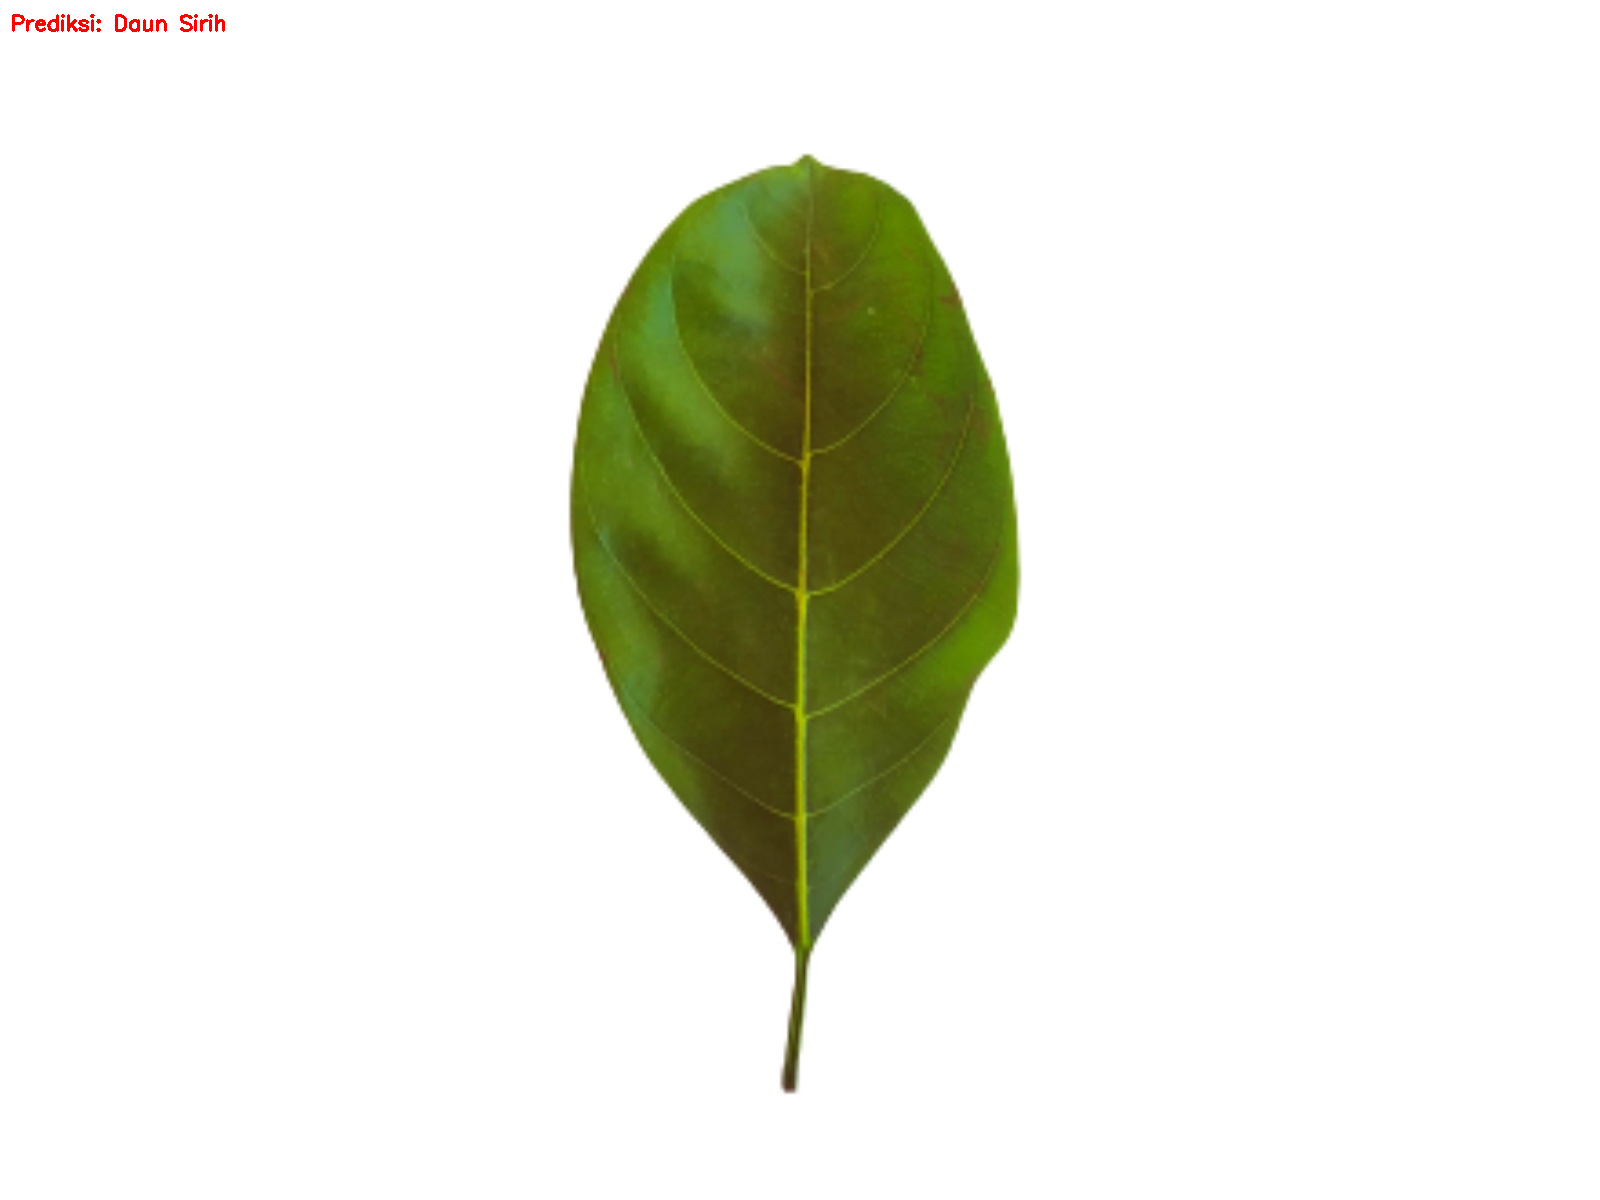


Daun Sirih Test:


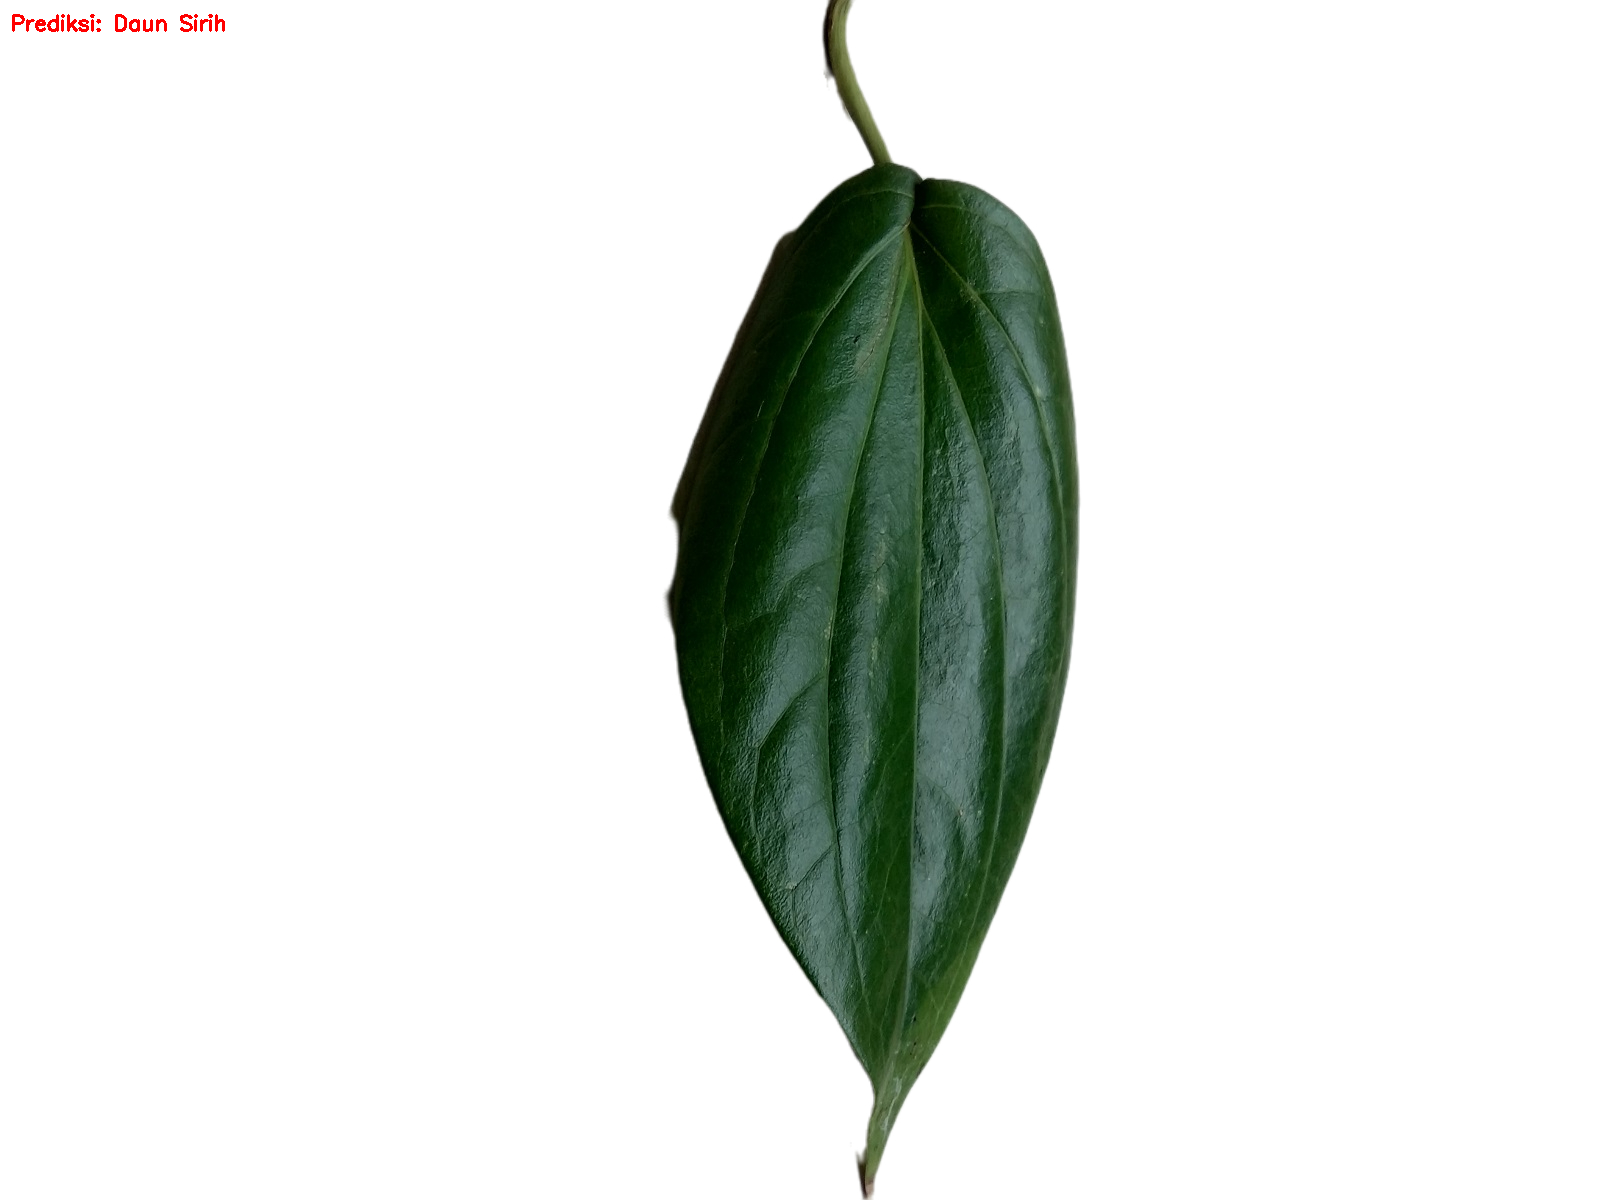

In [23]:
# Test with a "Daun Nangka" image
queryPath_nangka = imagePaths+'/Nangka/011.jpg'
query_nangka = cv2.imread(queryPath_nangka)
output_nangka = query_nangka.copy()
query_nangka_resized = cv2.resize(query_nangka, (32, 32))
q_nangka = []
q_nangka.append(query_nangka_resized)
q_nangka = np.array(q_nangka, dtype='float') / 255.0

q_pred_nangka = model.predict(q_nangka)

if q_pred_nangka <= 0.5:
    target_nangka = "Daun Sirih"
else:
    target_nangka = "Nangka"
text_nangka = "Prediksi: {}".format(target_nangka)
cv2.putText(output_nangka, text_nangka, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# Test with a "Daun Sirih" image
queryPath_sirih = imagePaths+'/Daun Sirih/011.jpg'
query_sirih = cv2.imread(queryPath_sirih)
output_sirih = query_sirih.copy()
query_sirih_resized = cv2.resize(query_sirih, (32, 32))
q_sirih = []
q_sirih.append(query_sirih_resized)
q_sirih = np.array(q_sirih, dtype='float') / 255.0

q_pred_sirih = model.predict(q_sirih)

if q_pred_sirih <= 0.5:
    target_sirih = "Daun Sirih"
else:
    target_sirih = "Nangka"
text_sirih = "Prediksi: {}".format(target_sirih)
cv2.putText(output_sirih, text_sirih, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# Display both images
print("Daun Nangka Test:")
from google.colab.patches import cv2_imshow
cv2_imshow(output_nangka)

print("\nDaun Sirih Test:")
cv2_imshow(output_sirih)

In [21]:
# model.save('image_classification.h5')

**Menambahkan algoritma Transfer Learning (MobileNetV2)**



Gunakan model CNN besar yang sudah dilatih di dataset besar (ImageNet), lalu fine-tune pakai dataset daun.

In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False  # Bekukan layer dasar

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model_tl = Model(inputs=base_model.input, outputs=output)
model_tl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

H_tl = model_tl.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32)


/tmp/ipython-input-3085456191.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5389 - loss: 0.6916 - val_accuracy: 0.3810 - val_loss: 0.7122
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5428 - loss: 0.6899 - val_accuracy: 0.3810 - val_loss: 0.7069
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5467 - loss: 0.6894 - val_accuracy: 0.3810 - val_loss: 0.7030
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5506 - loss: 0.6893 - val_accuracy: 0.3810 - val_loss: 0.7009
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.4998 - loss: 0.6932 - val_accuracy: 0.3810 - val_loss: 0.6978
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5154 - loss: 0.6910 - val_accuracy: 0.3810 - val_loss: 0.6986
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5389 - loss: 0.6892 - val_accuracy: 0.3810 - val_loss: 0.7018
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.5272 - loss: 0

**Menambahkan Algoritma Evaluasi Confusion Matrix dan Classification Report**


Menambahkan algoritma evaluasi agar kita bisa tahu performa tiap kelas (bukan hanya akurasi total).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         8

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



<Axes: >

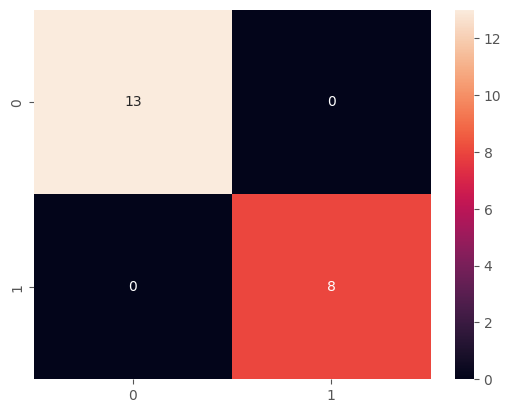

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

pred = (model.predict(x_test) > 0.5).astype("int32")

print(classification_report(y_test, pred))

sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d")
